### <center><b> TRỰC QUAN HÓA DỮ LIỆU - 21KHDL </b></center>
# <p style="text-align:center;color:#254E58"><b> LAB 03 - IRIS </b></p>

---

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Thông tin thành viên</b></div>

- 21127115 - Trần Thanh Ngân
- 21127229 - Dương Trường Bình
- 21127616 - Lê Phước Quang Huy

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Mục lục</b></div>

<div class="list-group" id="list-tab" role="tablist">

   * [Đọc dữ liệu](#1)
        
   * [A. Mô tả dữ liệu](#A)
   
   * [B. Khám phá và Phân tích dữ liệu](#B)
        - [Câu hỏi 1](#B.1)
        - [Câu hỏi 2](#B.2)
        - [Câu hỏi 3](#B.3)
        - [Câu hỏi 4](#B.4)
        - [Câu hỏi 5](#B.5)
        - [Câu hỏi 6](#B.6)

   * [C. Interactive Data Visualization](#C)
   
   * [D. Insights](#D)
   

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Các thư viện sử dụng</b></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Đọc dữ liệu</b></div>

## <span style='color:#074173'> <b> 👉 Iris Dataset </b> </span>

In [2]:
# read data iris in folder data
df = pd.read_csv('../data/iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe().round(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0,150.0,150.0,150.0,150.0
mean,75.5,5.8,3.1,3.8,1.2
std,43.4,0.8,0.4,1.8,0.8
min,1.0,4.3,2.0,1.0,0.1
25%,38.2,5.1,2.8,1.6,0.3
50%,75.5,5.8,3.0,4.4,1.3
75%,112.8,6.4,3.3,5.1,1.8
max,150.0,7.9,4.4,6.9,2.5


Missing rate của dữ liệu

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## <span style='color:#074173'> <b> 👉 Tỷ lệ dữ liệu bị thiếu </b> </span>

- ### Tỷ lệ cột bị thiếu

In [6]:
missing_rates = df.isna().sum() / len(df) * 100
missing_rates_df = pd.DataFrame({'Tên cột': missing_rates.index, 'Tỉ lệ thiếu dữ liệu (%)': missing_rates.values})
missing_rates_df = missing_rates_df.sort_values(by="Tỉ lệ thiếu dữ liệu (%)", ascending=False)
missing_rates_df.style.background_gradient(cmap='Reds', subset=['Tỉ lệ thiếu dữ liệu (%)'])
# missing_rates_df.style.bar(subset=['Tỉ lệ thiếu dữ liệu (%)'], color='#d65f5f')

,Tên cột,Tỉ lệ thiếu dữ liệu (%)
0,Id,0.000000
1,SepalLengthCm,0.000000
2,SepalWidthCm,0.000000
3,PetalLengthCm,0.000000
4,PetalWidthCm,0.000000
5,Species,0.000000


- ### Tỷ lệ dòng bị thiếu

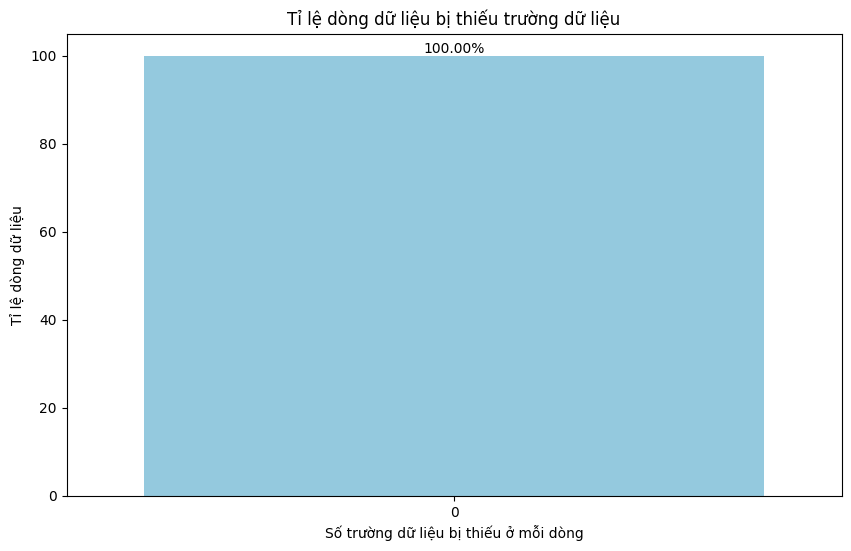

In [7]:
missing_rates_rows = df.isna().sum(axis=1)
missing_rates_rows = missing_rates_rows.value_counts().sort_index() / len(df) * 100
# ghi số lên biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_rates_rows.index, y=missing_rates_rows.values, color='skyblue')
plt.xlabel('Số trường dữ liệu bị thiếu ở mỗi dòng')
plt.ylabel('Tỉ lệ dòng dữ liệu')
plt.title('Tỉ lệ dòng dữ liệu bị thiếu trường dữ liệu')
for i in range(len(missing_rates_rows)):
    plt.text(i, missing_rates_rows.values[i], f'{missing_rates_rows.values[i]:.2f}%', ha='center', va='bottom')
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>A. Mô tả dữ liệu</b></div>

- Tập dữ liệu bao gồm ba loài `iris` với 50 mẫu mỗi loài cũng như một số đặc tính về mỗi loài hoa. Một loài hoa có thể phân tách tuyến tính với hai loài còn lại, nhưng hai loài còn lại không thể phân tách tuyến tính với nhau. [Iris Species](https://www.kaggle.com/datasets/uciml/iris/data) 

## <span style='color:#074173'> <b>👉 Iris Species </b> </span>

Tập dữ liệu `Iris.csv` chứa 150 dòng và 5 cột, mỗi dòng tương ứng cho đặc điểm của một loài hoa:

|STT | Tên thuộc tính | Mô tả | Giá trị | Kiểu dữ liệu |
|:---| :---           |:---   |:---     |:---          |
| 1  | Id | Mã của hoa | Nằm trong phạm vi từ 1 đến 150 | Integer |
| 2  | SepalLengthCm  | Chiều dài lá | Nằm trong khoảng từ 4.3 đến 7.9 | Float |
| 3  | SepalWidthCm | Chiều rộng lá | Nằm trong khoảng từ 2 đến 4.4 | Float |
| 4  | PetalLengthCm | Chiều dài cánh hoa | Nằm trong khoảng từ 1 đến 6.9 | Float |
| 5  | PetalWidthCm | Chiều rộng cánh hoa | Nằm trong khoảng từ 0.1 đến 2.5 | Float |
| 6  | Species | Giống loài hoa | Gồm 3 loại `Iris-setosa`, `Iris-versicolor` và `Iris-virginica` | String |

## <span style='color:#074173'> <b>👉 Phân phối của các cột Numerical và Categorical </b> </span>

In [14]:
## 1. Chia loại dữ liệu numeric hoặc categorical
cate_list = list(df.dtypes[df.dtypes == 'object'].index)
num_list = list(df.dtypes[df.dtypes != 'object'].index)

- ### Cột Categorical

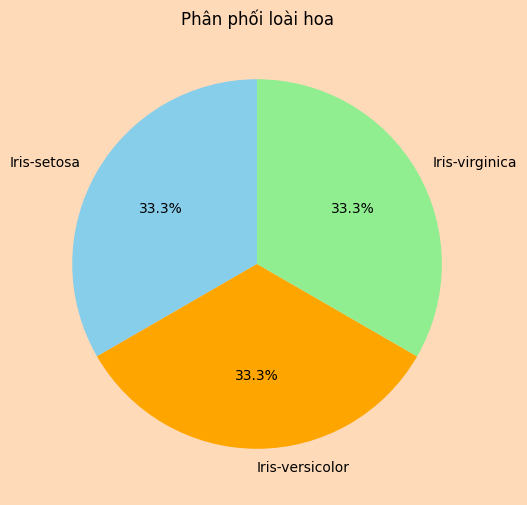

In [18]:
# vẽ biểu đồ tròn của Species
plt.figure(figsize=(10, 6))
df['Species'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Phân phối loài hoa')
plt.ylabel('')
plt.show()



#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Tập dữ liệu chia đều cho 3 loài hoa.

- ### Cột Numerical

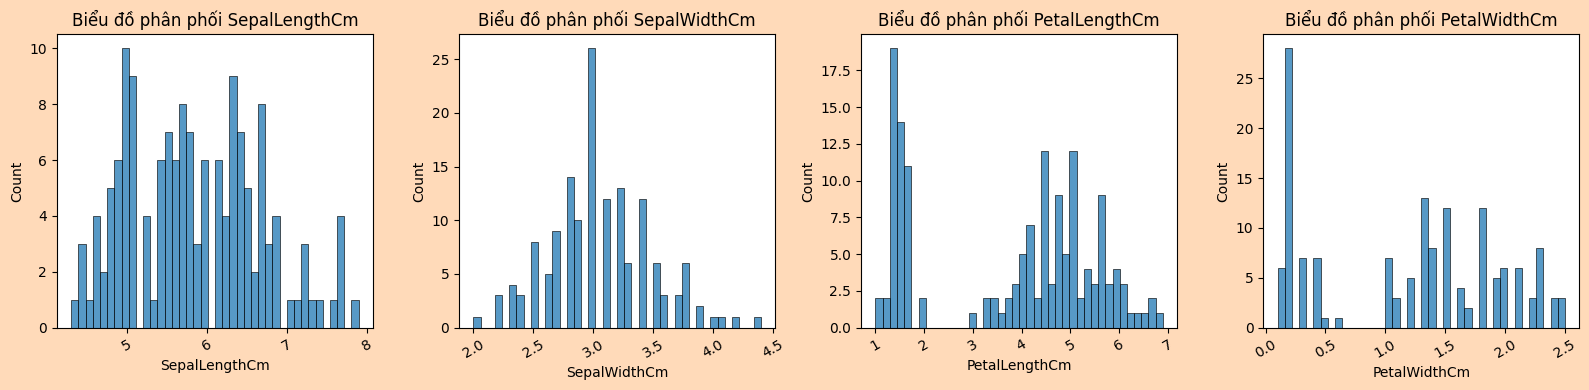

In [16]:
num_num_cols = len(num_list[1:])
num_rows = num_num_cols // 4 + (1 if num_num_cols % 4 != 0 else 0)

plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(num_list[1:], 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(df[col], bins=40)
    plt.title(f'Biểu đồ phân phối {col}')
    plt.xlabel(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- `Chiều dài của đài hoa (SepalLengthCm)`: Phân phối này có dạng phân phối chuẩn tương đối, với nhiều quan sát tập trung trong khoảng từ 5 đến 7 cm.

- `Chiều rộng của đài hoa (SepalWidthCm)`: Phân phối này cũng khá chuẩn nhưng có một đỉnh rõ rệt xung quanh giá trị 3 cm. Điều này có thể cho thấy rằng chiều rộng của đài hoa trong tập dữ liệu này có xu hướng tập trung nhiều vào một giá trị cụ thể.

- `Chiều dài của cánh hoa (PetalLengthCm)`: Phân phối này cho thấy có hai nhóm dữ liệu rõ rệt, một nhóm có chiều dài ngắn hơn (từ 1 đến 2 cm) và nhóm còn lại có chiều dài dài hơn (từ 3 đến 6 cm). Điều này giúp nhận biết sự phân chia trong đặc tính của chiều dài cánh hoa và có thể liên quan đến sự phân biệt giữa các loài trong tập dữ liệu iris.

- `Chiều rộng của cánh hoa (PetalWidthCm)`: Phân phối này cũng cho thấy sự tồn tại của hai nhóm dữ liệu. Một nhóm quan sát tập trung chủ yếu dưới 1 cm và nhóm còn lại tập trung trong khoảng từ 1 đến 2,5 cm. Đây cũng có thể là dấu hiệu của sự phân biệt giữa các loài trong tập dữ liệu.


# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>B. Khám phá và Phân tích dữ liệu</b></div>

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 1: Phân phối của các đặc tính của hoa Iris như thế nào? Có sự khác biệt nào rõ rệt khi xem xét phân bố của các đặc tính không?</b></div>

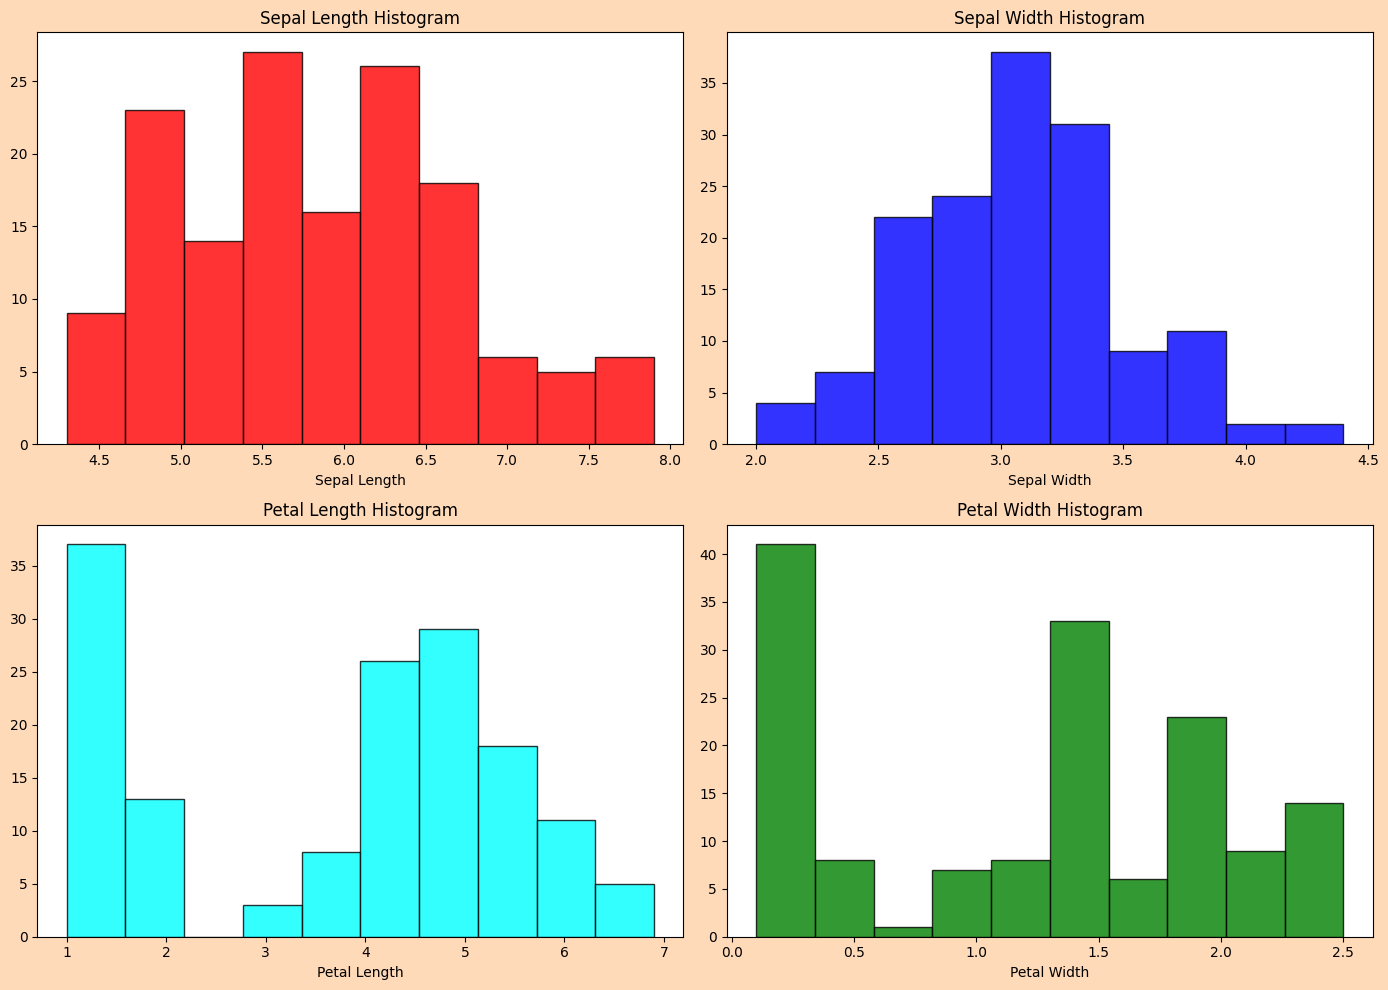

In [8]:
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.facecolor'] = '#FFDAB9'

# Create histograms
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['SepalLengthCm'],  color='red', edgecolor='black', alpha=0.8)
axs[0, 0].set_xlabel('Sepal Length')
axs[0, 0].set_title('Sepal Length Histogram')

axs[0, 1].hist(df['SepalWidthCm'],  color='blue', edgecolor='black', alpha=0.8)
axs[0, 1].set_xlabel('Sepal Width')
axs[0, 1].set_title('Sepal Width Histogram')

axs[1, 0].hist(df['PetalLengthCm'],  color='cyan', edgecolor='black', alpha=0.8)
axs[1, 0].set_xlabel('Petal Length')
axs[1, 0].set_title('Petal Length Histogram')

axs[1, 1].hist(df['PetalWidthCm'],  color='green', edgecolor='black', alpha=0.8)
axs[1, 1].set_xlabel('Petal Width')
axs[1, 1].set_title('Petal Width Histogram')

plt.tight_layout()
plt.show()

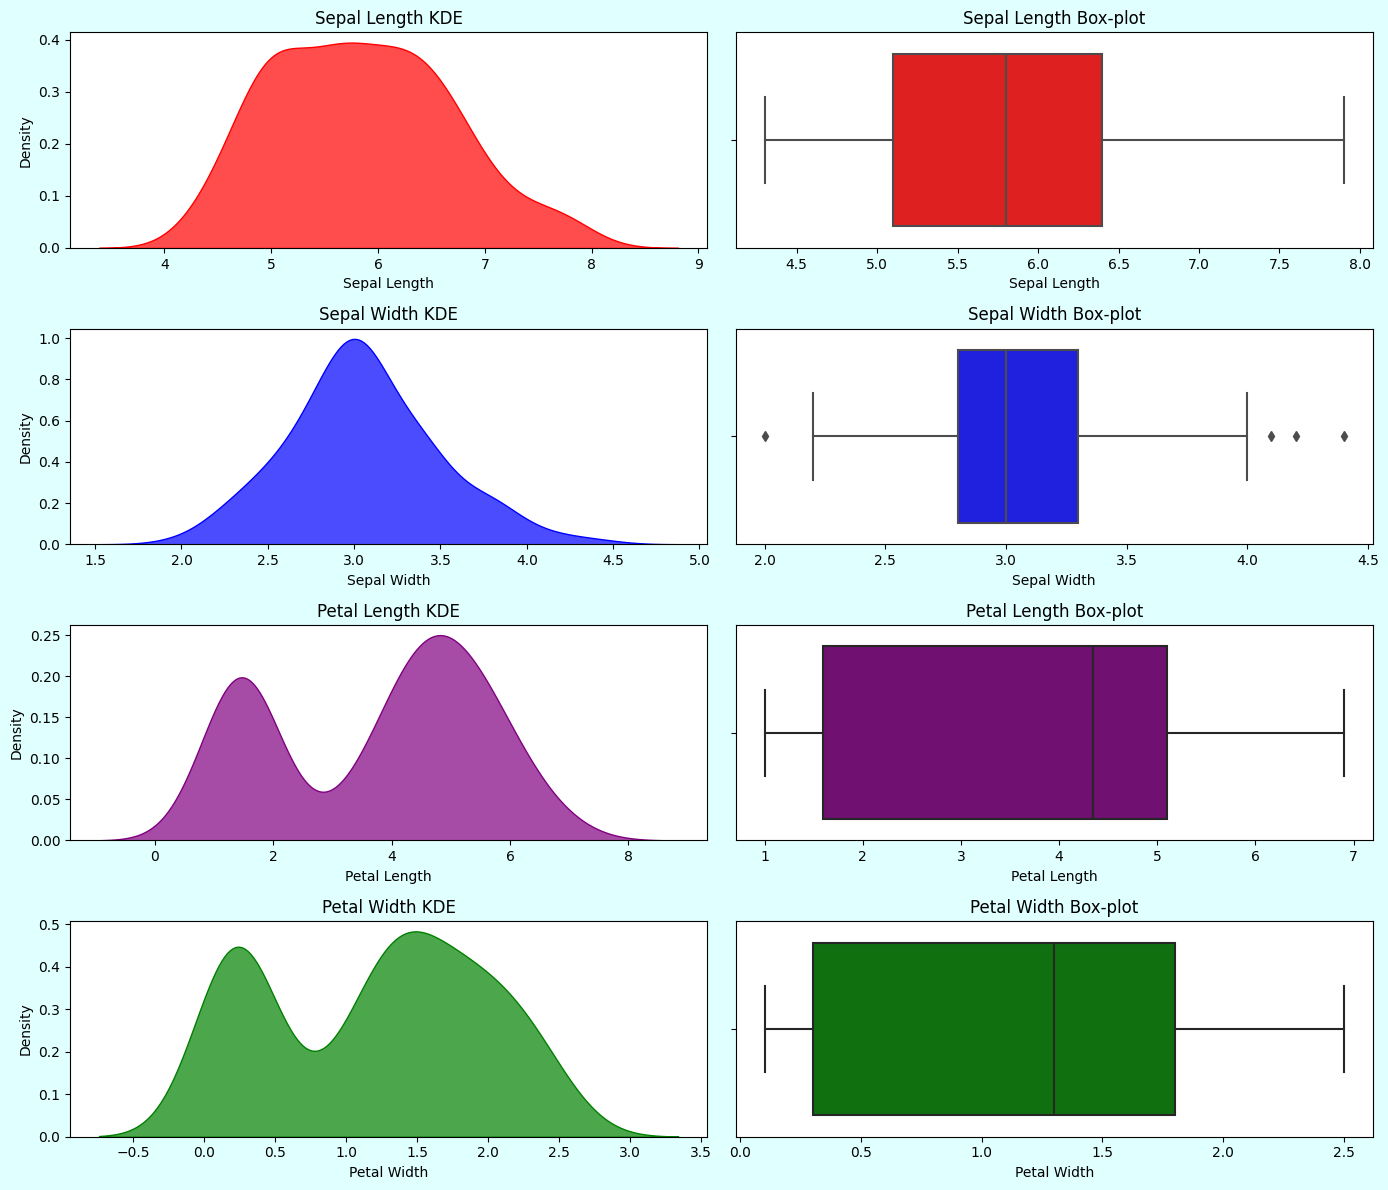

In [9]:
plt.figure(figsize=(14, 12))
plt.gcf().set_facecolor("#E0FFFF")

# Create subplots for KDE plots
plt.subplot(4, 2, 1)
sns.kdeplot(df['SepalLengthCm'], color='red', fill=True, alpha=0.7)
plt.xlabel('Sepal Length')
plt.title('Sepal Length KDE')

plt.subplot(4, 2, 2)
sns.boxplot(data=df, x='SepalLengthCm', color='red')
plt.xlabel('Sepal Length')
plt.title('Sepal Length Box-plot')

plt.subplot(4, 2, 3)
sns.kdeplot(df['SepalWidthCm'], color='blue', fill=True, alpha=0.7)
plt.xlabel('Sepal Width')
plt.title('Sepal Width KDE')

plt.subplot(4, 2, 4)
sns.boxplot(data=df, x='SepalWidthCm', color='blue')
plt.xlabel('Sepal Width')
plt.title('Sepal Width Box-plot')

plt.subplot(4, 2, 5)
sns.kdeplot(df['PetalLengthCm'], color='purple', fill=True, alpha=0.7)
plt.xlabel('Petal Length')
plt.title('Petal Length KDE')

plt.subplot(4, 2, 6)
sns.boxplot(data=df, x='PetalLengthCm', color='purple')
plt.xlabel('Petal Length')
plt.title('Petal Length Box-plot')

plt.subplot(4, 2, 7)
sns.kdeplot(df['PetalWidthCm'], color='green', fill=True, alpha=0.7)
plt.xlabel('Petal Width')
plt.title('Petal Width KDE')

plt.subplot(4, 2, 8)
sns.boxplot(data=df, x='PetalWidthCm', color='green')
plt.xlabel('Petal Width')
plt.title('Petal Width Box-plot')

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Trả lời: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ở câu hỏi đầu tiên, nhóm đã trực quan biểu đồ historgram để xem xét về tổng quan về phân bố của các đặc tính của hoa Iris.
- Đối với đặc tính `SepalLengthCm`, `SepalWidthCm`, tức là chiều dài và chiều rộng của lá, ta thấy rằng phân phối của chúng khá đều, không có sự khác biệt rõ rệt giữa các loại hoa.
- Đối với đặc tính `PetalLengthCm`, `PetalWidthCm`, tức là chiều dài và chiều rộng của cánh hoa, ta thấy rằng có sự tách biệt rõ rệt trong phân phối của 2 dặc tính này. Có thể có một loài hoa có chiều dài và chiều rộng cánh hoa nhỏ hơn so với các loài hoa còn lại.
- Để biết được rõ hơn về sự khác biệt giữa các loài hoa, nhóm sẽ tiếp tục khám phá ở các câu hỏi tiếp theo.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 2: Phân bố của các đặc tính của hoa Iris có sự khác biệt giữa các loài hoa không?</b></div>

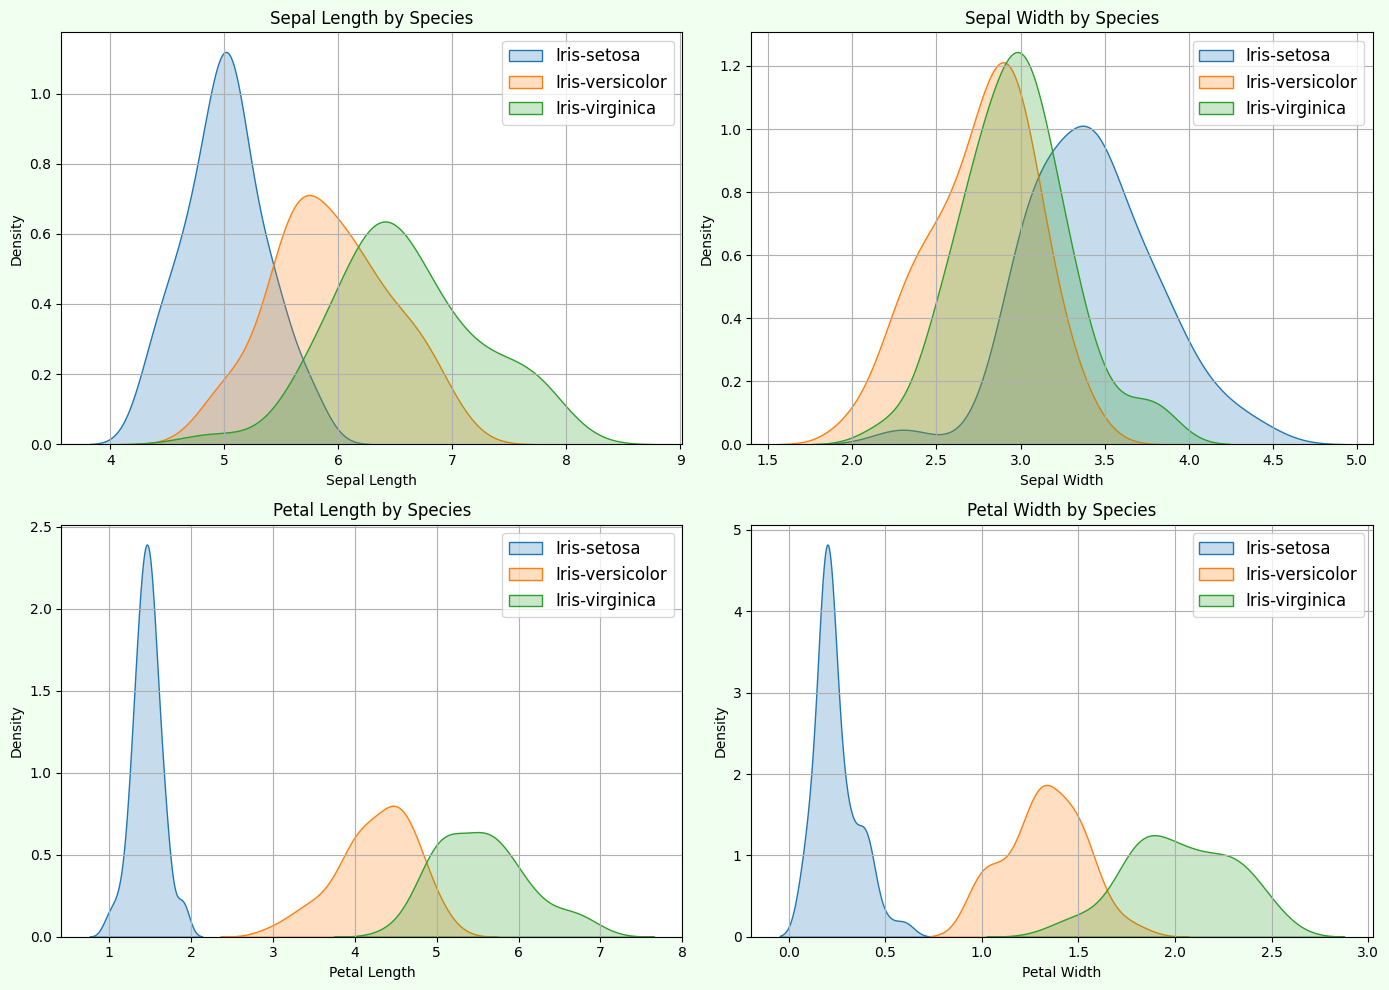

In [10]:
plt.figure(figsize=(14, 10))
plt.gcf().set_facecolor("#F0FFF0")

# Create subplots for KDE plots by species
plt.subplot(2, 2, 1)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['SepalLengthCm'], shade=True, label=species)
plt.xlabel('Sepal Length')
plt.title('Sepal Length by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 2)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['SepalWidthCm'], shade=True, label=species)
plt.xlabel('Sepal Width')
plt.title('Sepal Width by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 3)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['PetalLengthCm'], shade=True, label=species)
plt.xlabel('Petal Length')
plt.title('Petal Length by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(2, 2, 4)
for species in df['Species'].unique():
    sns.kdeplot(df[df['Species'] == species]['PetalWidthCm'], shade=True, label=species)
plt.xlabel('Petal Width')
plt.title('Petal Width by Species')
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

#### <span style='color:#074173'> 💬 Nhận xét: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">



# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 3: Những bộ phim nào có đánh giá cao nhất ? (1-5 sao)</b></div>

#### <span style='color:#074173'> 💬 Trả lời: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Bộ phim được đánh giá cao nhất là `Lost: Season 1` với điểm số lên đến `4.7 sao`. Hạng 2 thuộc về bộ phim "The Simpsons: Season 6" với 4.6 sao. 
- Từ hạng 3 đến hạng 10 lần lượt là:
    - 3. Family Guy: Freakin' Sweet Collection - **4.5 sao**
    - 4. Six Feet Under: Season 4 - **4.5 sao**
    - 5. Inu-Yasha - **4.5 sao**
    - 6. Stargate SG-1: Season 8 - **4.5 sao**
    - 7. The Best of Friends: Vol. 4 - **4.4 sao**
    - 8. The West Wing: Season 3 - **4.4 sao**
    - 9. Lord of the Rings: The Fellowship of the Ring - **4.4 sao**
    - 10. Gilmore Girls: Season 3 - **4.4 sao**
- Tuy nhiên, thứ hạng chỉ là một phần của bảng xếp hạng này. Mặc dù một số bộ phim có đánh giá cao, nhưng số lượng lượt đánh giá có thể không nhiều bằng những bộ phim khác. Do đó, cần phải xem xét cả hai yếu tố này để có cái nhìn toàn diện về sức hút của một bộ phim.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 4: Dựa trên việc xem xét cả hai yếu tố về Đánh giá và Tổng số lượt đánh giá, bộ phim nào có đánh giá tốt nhất ?</b></div>

#### <span style='color:#074173'> 💬 Trả lời: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Ta có thể thấy các bộ phim đã được xếp thứ hạng một cách tổng quát hơn dựa trên hai yếu tố là "đánh giá" và "số lượt đánh giá". 
- Theo đó, bộ phim có thứ hạng cao nhất theo thang đánh giá 1-5 sao thuộc về "Lord of the Rings: The Fellowship of the Ring" và "Finding Nemo (Widescreen)", với 4.4 sao và tương ứng với số lượt đánh giá lần lượt là 102,721 và 94,235 lượt.
- Tuy nhiên, nếu nhìn vào số lượng lượt đánh giá thì bộ phim "Pirates of the Caribbean: The Curse of the Black Pearl" lại chiếm vị trí hàng đầu với 117,075 lượt và đạt điểm số trung bình 4.1 sao. Điều này cho thấy sức hút lớn của bộ phim này đối với khán giả, dù điểm số trung bình có thể không cao bằng một số bộ phim khác.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 5: Những yếu tố nào hình thành nên sự khác biệt của các loài hoa</b></div>

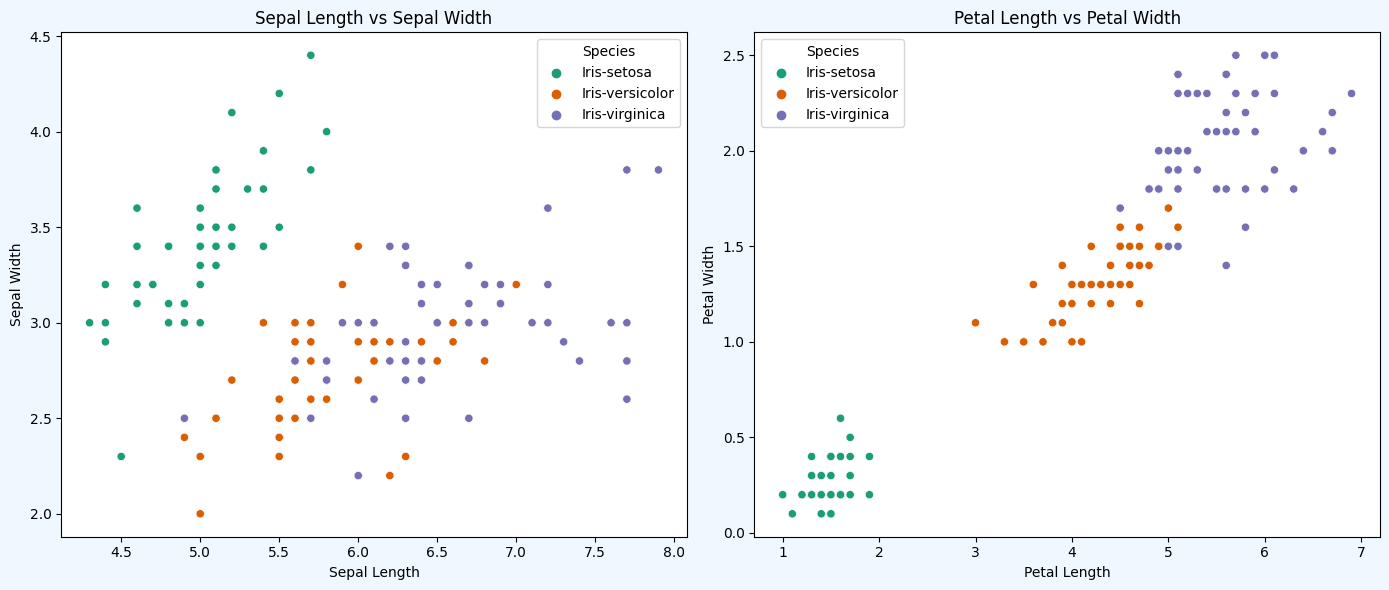

In [13]:


plt.figure(figsize=(14, 6))
plt.gcf().set_facecolor("#F0F8FF")

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Dark2')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Dark2')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()


#### <span style='color:#074173'> 💬 Trả lời: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Từ biểu đồ 1 ta thấy được:
    - Loài `Setosa` có chiều dài lá đài ngắn hơn nhưng chiều rộng lá đài lớn hơn.
    - Loài `Versicolor`  có chiều dài và rộng của lá đài đều nhỏ hơn so với 2 loài còn lại
    - Loài `Virginica` có lá đài dài hơn nhưng chiều rộng lá đài nhỏ hơn.
- Đối với biểu đồ 2:
    - Loài `Setosa` có chiều dài và chiều rộng cánh hoa nhỏ hơn hẳn so với 2 loài còn lại. 
    - Loài `Versicolor` nằm ở giữa đường chéo phụ của hai loài còn lại về chiều dài và chiều rộng của cánh hoa.
    - Loài `Virginica` có chiều dài và chiều rộng cánh hoa lớn nhất.


=> Từ những thông tin trên ta có một số kết luận như:
- Loài hoa có cánh hoa nhỏ, ngắn và lá đài ngắn nhưng chiều rộng lá đài lớn thì ta có thể suy ra đây là loài `Setosa`
- Loài mà có cả lá đài dài và cánh hoa vừa rộng vừa dài thì đó là loài `Virginica`

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>❓ Câu hỏi 6: Mỗi khoảng đánh giá (1-5 sao) lần lượt chiếm tỷ trọng bao nhiêu trong toàn bộ kết quả đánh giá từ người xem ?</b></div>

#### <span style='color:#074173'> 💬 Trả lời: </span>
<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Phần lớn người xem (chiếm 34.0%) đánh giá các bộ phim với mức 4 sao, cho thấy mức độ hài lòng lớn với chất lượng và trải nghiệm xem phim.
- Trong khi đó các bộ phim được đánh giá với mức 5 - mức cao nhất, chỉ chiếm 21.7%, có thể do người xem đặt tiêu chuẩn cao hơn cho mức đánh giá cao nhất này.
- Số lượng phim được đánh giá với mức trung bình là 3 sao cũng khá phổ biến, chiếm 29.9% trên tổng số, cho thấy một phần đáng kể của người xem có ý kiến trung bình về các bộ phim này.
- Cuối cùng là các đánh giá thấp hơn - 2 sao và 1 sao - lần lượt là 10,1% và 4.2%. Tuy chỉ chiếm tỷ trọng nhỏ, nhưng qua đó cũng có thể thấy một số ít người xem không hài lòng hoặc có nhận định tiêu cực về một số bộ phim.
- Khi quan sát kĩ hơn qua từng năm *(biểu đồ bên phải)*, ta nhận thấy một tăng trưởng đáng kể trong số lượt đánh giá từ người xem trong những năm gần đây, đặc biệt là từ năm 1980 trở đi. Trước đó, đa số là những lượt đánh giá từ 3 sao đến 4.3 sao. Trong khi đó, trong những năm gần đây, phân bố này trải rộng hơn, từ các đánh giá thấp nhất là 2 sao đến những đánh giá cao nhất là 4.7 sao (gần 5 sao), cho thấy sự phổ biến và đa dạng của các bộ phim.

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>C. Trực quan dữ liệu tương tác</b></div>

Để khám phá dữ liệu theo cách tự nhiên và linh hoạt hơn, từ đó tạo ra trải nghiệm tương tác thú vị và cá nhân hóa theo từng mục đích sử dụng của mỗi người, ở phần này cho phép mọi người có thể tương tác trực tiếp với các biểu đồ thông qua các tùy chọn (dropdown options) cũng như kéo thả thao tác trên chính biểu đồ đó.

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Top các bộ phim có rating cao nhất theo từng năm </b></div>

# <div style="padding:10px;color:white;margin:0;font-size:20px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Sự biến động (tăng/giảm) của số lượng phim qua từng năm </b></div>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>D. Insights</b></div>

<div style="border-radius:10px;border:#0C6A86 solid;padding:5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">
Trong quá trình khám phá toàn diện tập dữ liệu `Netflix_Movie_Rating_Dataset` bằng các công cụ trực quan phân tích như Matplotlib, Seaborn và Plotly, nhóm đã tìm hiểu sâu về vô số khía cạnh của bối cảnh nội dung trên nền tảng Netflix. Trong phần này, nhóm sẽ chia sẻ những phát hiện thú vị nhất, bao gồm các xu hướng thị trường trong ngành công nghiệp điện ảnh, sở thích và đánh giá của người xem đối với các bộ phim và chương trình truyền hình:

- **Khám phá sâu về các thị trường điện ảnh qua các thập kỷ:**
  - Phân tích tiết lộ các xu hướng của thị trường trong ngành công nghiệp điện ảnh từ những năm 1915 đến năm 2005, cũng như sở thích và đánh giá của người xem đối với các nội dung trên Netflix.
  - Qua việc xem xét xu hướng sản xuất và tiêu thụ nội dung điện ảnh qua các thập kỷ, chúng ta thấy được sự thay đổi, phát triển và ngày một tăng trưởng của ngành công nghiệp điện ảnh trong thời gian qua, nhất là liên tiếp 5 năm từ 2000-2004 số lượng phim được ra mắt luôn cao hơn so với các năm trước và vượt ngưỡng 1000 bộ phim, có năm gần chạm mức 1500 phim trong một năm.

- **Đa dạng và phân bổ của nội dung trên Netflix:**
  - Khi đi sâu hơn vào các bộ phim và xếp hạng của chúng, ta có thể thấy được sự đa dạng và phân bổ của các bộ phim và chương trình truyền hình cùng với mức độ xếp hạng khác nhau của chúng.

- **Hiểu sâu hơn về sở thích và đánh giá của người dùng:**
  - Bằng cách phân tích các đánh giá và xếp hạng từ người dùng trên Netflix, chúng ta hiểu rõ hơn về sở thích và xu hướng xem phim của họ.
  - Những bộ phim nổi tiếng vừa có điểm số đánh giá cao vừa có đông đảo lượng đánh giá từ người xem, có thể kể đến như: "Pirates of the Caribbean: The Curse of the Black Pearl" hay "Lord of the Rings: The Fellowship of the Ring", cũng như những tựa phim kéo dài nhiều mùa được ưa thích như The Simpsons mà đáng chú ý là "The Simpsons: Season 6" với 4.6 sao từ khán giả.

